<a href="https://colab.research.google.com/github/Alenushka2013/Coursera-IBM-Data-Science/blob/main/8_5_2_final_dash.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

My final answer (dashboard doesn`t fit the screen)



In [ ]:
#!/usr/bin/env python
# coding: utf-8

# In[ ]:


import dash
import more_itertools
from dash import dcc
from dash import html
from dash.dependencies import Input, Output
import pandas as pd
import plotly.graph_objs as go
import plotly.express as px

# Load the data using pandas
data = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv')

# Initialize the Dash app
app = dash.Dash(__name__)

# Set the title of the dashboard
#app.title = "Automobile Statistics Dashboard"

#---------------------------------------------------------------------------------
# Create the dropdown menu options
dropdown_options = [
    {'label': 'Yearly Statistics', 'value': 'Yearly Statistics'},
    {'label': 'Recession Period Statistics', 'value': 'Recession Period Statistics'}
]
# List of years
year_list = [i for i in range(1980, 2024, 1)]
#---------------------------------------------------------------------------------------
# Create the layout of the app
app.layout = html.Div([
        html.H1("Automobile Statistics Dashboard", style={'textAlign':'center', 'color':'#503D36', 'font-size':'24'}),
        html.Div([
            html.Label("Select Statistics:"),
            dcc.Dropdown(
                id='dropdown-statistics',
                options=dropdown_options,
                value='Select Statistics'
            )
        ]),
        html.Div(dcc.Dropdown(
                id='select-year',
                options=[{'label': i, 'value': i} for i in year_list],
                value='Select-year'
            )),

        html.Div([
        html.Div(id='output-container', className='chart-grid', style={'display': 'flex'}),
        ])
    ])

#TASK 2.4: Creating Callbacks
# Define the callback function to update the input container based on the selected statistics
@app.callback(
    Output(component_id='select-year', component_property='disabled'),
    Input(component_id='dropdown-statistics',component_property='value'))

def update_input_container(selected_statistics):
    if selected_statistics =='Yearly Statistics':
        return False
    else:
        return True

#Callback for plotting
# Define the callback function to update the input container based on the selected statistics
@app.callback(
    Output(component_id='output-container', component_property='children'),
    [Input(component_id='dropdown-statistics', component_property='value'),
    Input(component_id='select-year', component_property='value') ])


def update_output_container(selected_statistics, input_year):
    if selected_statistics == 'Recession Period Statistics':
        # Filter the data for recession periods
        recession_data = data[data['Recession'] == 1]

#TASK 2.5: Create and display graphs for Recession Report Statistics

#Plot 1 Automobile sales fluctuate over Recession Period (year wise)
        # use groupby to create relevant data for plotting
        yearly_rec=recession_data.groupby('Year')['Automobile_Sales'].mean().reset_index()
        R_chart1 = dcc.Graph(
            figure=px.line(yearly_rec,
                x='Year',
                y='Automobile_Sales',
                title="Average Automobile Sales fluctuation over Recession Period"))

#Plot 2 Calculate the average number of vehicles sold by vehicle type

        # use groupby to create relevant data for plotting
        #Hint:Use Vehicle_Type and Automobile_Sales columns
        average_sales = recession_data.groupby('Vehicle_Type')['Automobile_Sales'].mean().reset_index()
        R_chart2  = dcc.Graph(
            figure=px.bar(average_sales,
            x='Vehicle_Type',
            y='Automobile_Sales',
            title="Average Number of Vehicles Sold by Vehicle Type"))

# Plot 3 Pie chart for total expenditure share by vehicle type during recessions
        # grouping data for plotting
	# Hint:Use Vehicle_Type and Advertising_Expenditure columns
        exp_rec= recession_data.groupby('Vehicle_Type')['Advertising_Expenditure'].sum().reset_index()
        R_chart3 = dcc.Graph(
            figure=px.pie(exp_rec,
            values='Advertising_Expenditure',
            names='Vehicle_Type',
            title="Total Expenditure Share by Vehicle Type During Recessions")
        )

# Plot 4 bar chart for the effect of unemployment rate on vehicle type and sales
        #grouping data for plotting
	# Hint:Use unemployment_rate,Vehicle_Type and Automobile_Sales columns
        unemp_data = recession_data.groupby(['unemployment_rate', 'Vehicle_Type'])['Automobile_Sales'].mean().reset_index()
        R_chart4 = dcc.Graph(figure=px.bar(unemp_data,
        x='unemployment_rate',
        y='Automobile_Sales',
        labels={'unemployment_rate': 'Unemployment Rate', 'Automobile_Sales': 'Average Automobile Sales'},
        title='Effect of Unemployment Rate on Vehicle Type and Sales'))


        return [
            html.Div(className='chart-item', children=[R_chart1, R_chart2]),
            html.Div(className='chart-item', children=[R_chart3, R_chart4])
        ]

# TASK 2.6: Create and display graphs for Yearly Report Statistics
 # Yearly Statistic Report Plots
    # Check for Yearly Statistics.
    elif (input_year and selected_statistics=='Yearly Statistics') :
        yearly_data = data[data['Year'] == input_year]



#plot 1 Yearly Automobile sales using line chart for the whole period.
        # grouping data for plotting.
        # Hint:Use the columns Year and Automobile_Sales.
        yas= data.groupby('Year')['Automobile_Sales'].mean().reset_index()
        Y_chart1 = dcc.Graph(figure=px.line(yas,
        x='Year',
        y='Automobile_Sales',
        title="Yearly Automobile Sales"))

# Plot 2 Total Monthly Automobile sales using line chart.
        # grouping data for plotting.
	# Hint:Use the columns Month and Automobile_Sales.
        mas=data.groupby('Month')['Automobile_Sales'].sum().reset_index()
        Y_chart2 = dcc.Graph(figure=px.line(mas,
            x='Month',
            y='Automobile_Sales',
            title='Total Monthly Automobile Sales'))

  # Plot bar chart for average number of vehicles sold during the given year
         # grouping data for plotting.
         # Hint:Use the columns Year and Automobile_Sales
        avr_vdata=yearly_data.groupby('Vehicle_Type')['Automobile_Sales'].mean().reset_index()
        Y_chart3 = dcc.Graph(figure=px.bar(avr_vdata,
        x='Vehicle_Type',
        y='Automobile_Sales',
        title='Average Vehicles Sold by Vehicle Type in the year {}'.format(input_year)))

    # Total Advertisement Expenditure for each vehicle using pie chart
         # grouping data for plotting.
         # Hint:Use the columns Vehicle_Type and Advertising_Expenditure
        exp_data=yearly_data.groupby('Vehicle_Type')['Advertising_Expenditure'].sum().reset_index()
        Y_chart4 = dcc.Graph(figure=px.pie(exp_data,
        values='Advertising_Expenditure',
        names='Vehicle_Type',
        title="Total Advertisment Expenditure for Each Vehicle Type"))

#TASK 2.6: Returning the graphs for displaying Yearly data
        return [
            html.Div(className='chart-item', children=[Y_chart1, Y_chart2]),
            html.Div(className='chart-item', children=[Y_chart3, Y_chart4])
        ]
    else:
        return None

# Run the Dash app
if __name__ == '__main__':
    app.run_server(debug=True)

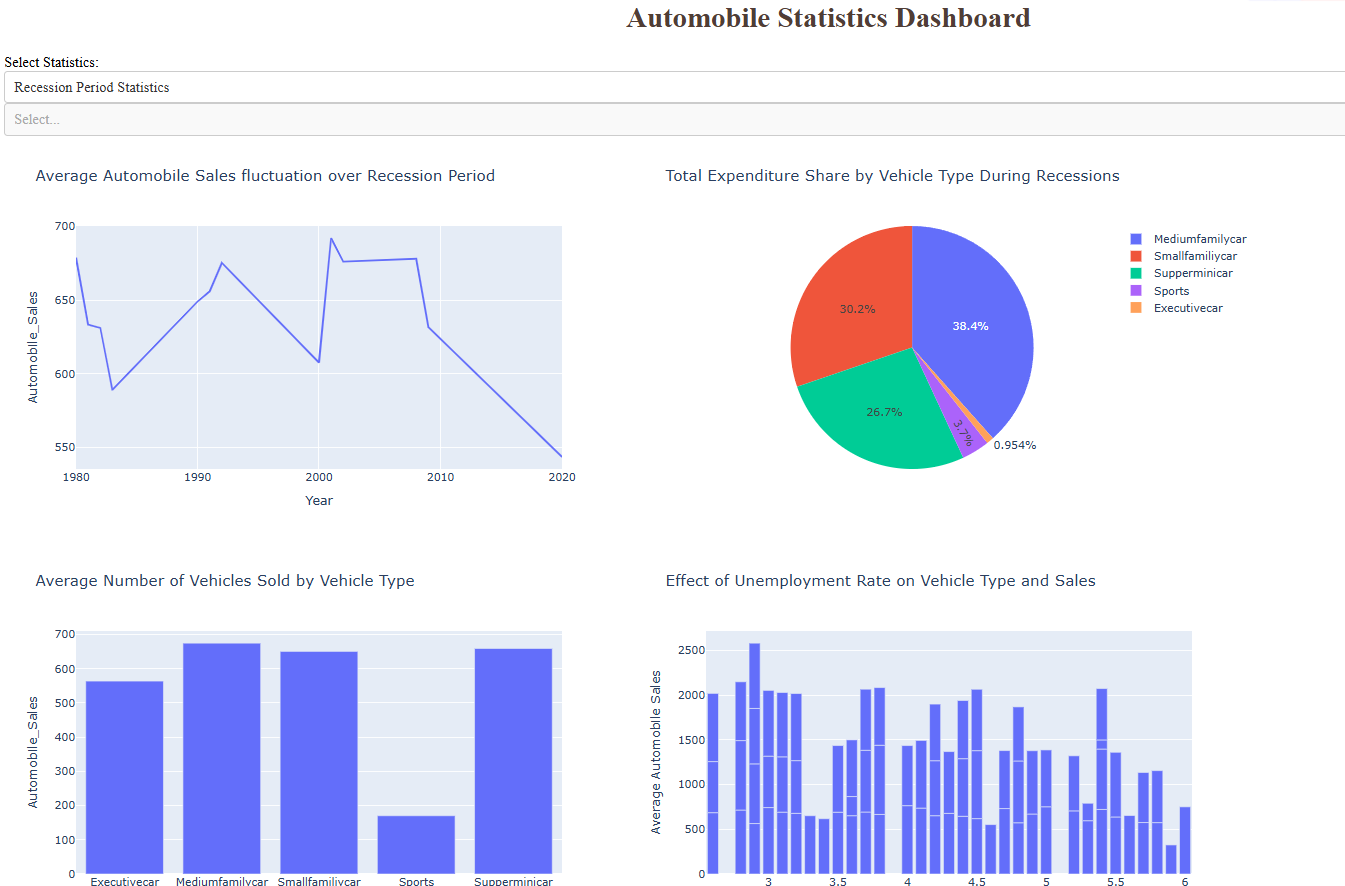